## Using t-SNE for Data Visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [2]:
# load dataset
data = datasets.fetch_openml(
    'Fashion-MNIST',
    version=1,
    return_X_y=True
)
# data returns a tuple (features, target)
features, target = data
target = target.astype(int)

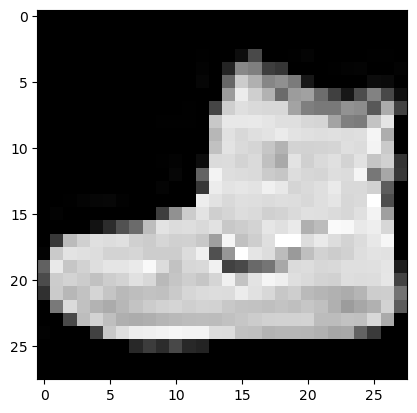

In [3]:
# reshape the features for plotting image
image = features.iloc[0].values.reshape(28, 28)
plt.imshow(image, cmap='gray')

In [7]:
# dimensionality reduction using t-SNE
tsne = manifold.TSNE(n_components=2, random_state=42)
# fit and transform
mnist_tr = tsne.fit_transform(features[:30000])
# transformed_data is a 2D numpy array of shape (30000, 2)

In [10]:
# create dataframe
cps_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((mnist_tr, 
                                            target.iloc[:30000])))
# cast targets column to int
cps_df.loc[:, 'target'] = cps_df.target.astype(int)
cps_df.head()

,CP1,CP2,target
0,-44.542831,65.811104,9.0
1,60.794220,-60.107079,0.0
2,-0.723386,-24.853523,0.0
3,9.003551,-29.098331,3.0
4,1.747059,-52.236965,0.0


In [13]:
clothes_map = {0:'T-shirt/top',
               1: 'Trouser',
               2: 'Pullover',
               3: 'Dress',
               4: 'Coat',
               5: 'Sandal',
               6: 'Shirt',
               7: 'Sneaker',
               8: 'Bag',
               9: 'Ankle Boot'}
# map targets to actual clothes for plotting
cps_df.loc[:, 'target'] = cps_df.target.map(clothes_map)

/var/folders/z_/np8s82yx343fgrk87sx19gn40000gn/T/ipykernel_4044/1335286527.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Ankle Boot' 'T-shirt/top' 'T-shirt/top' ... 'Sneaker' 'T-shirt/top'
 'Bag']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cps_df.loc[:, 'target'] = cps_df.target.map(clothes_map)


<Axes: xlabel='target'>

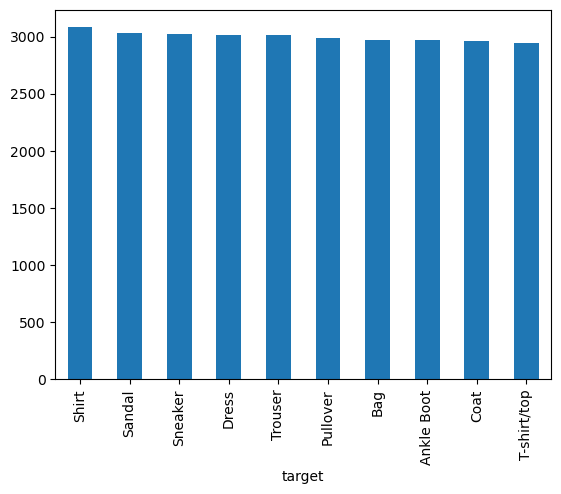

In [14]:
cps_df.target.value_counts().plot(kind='bar')

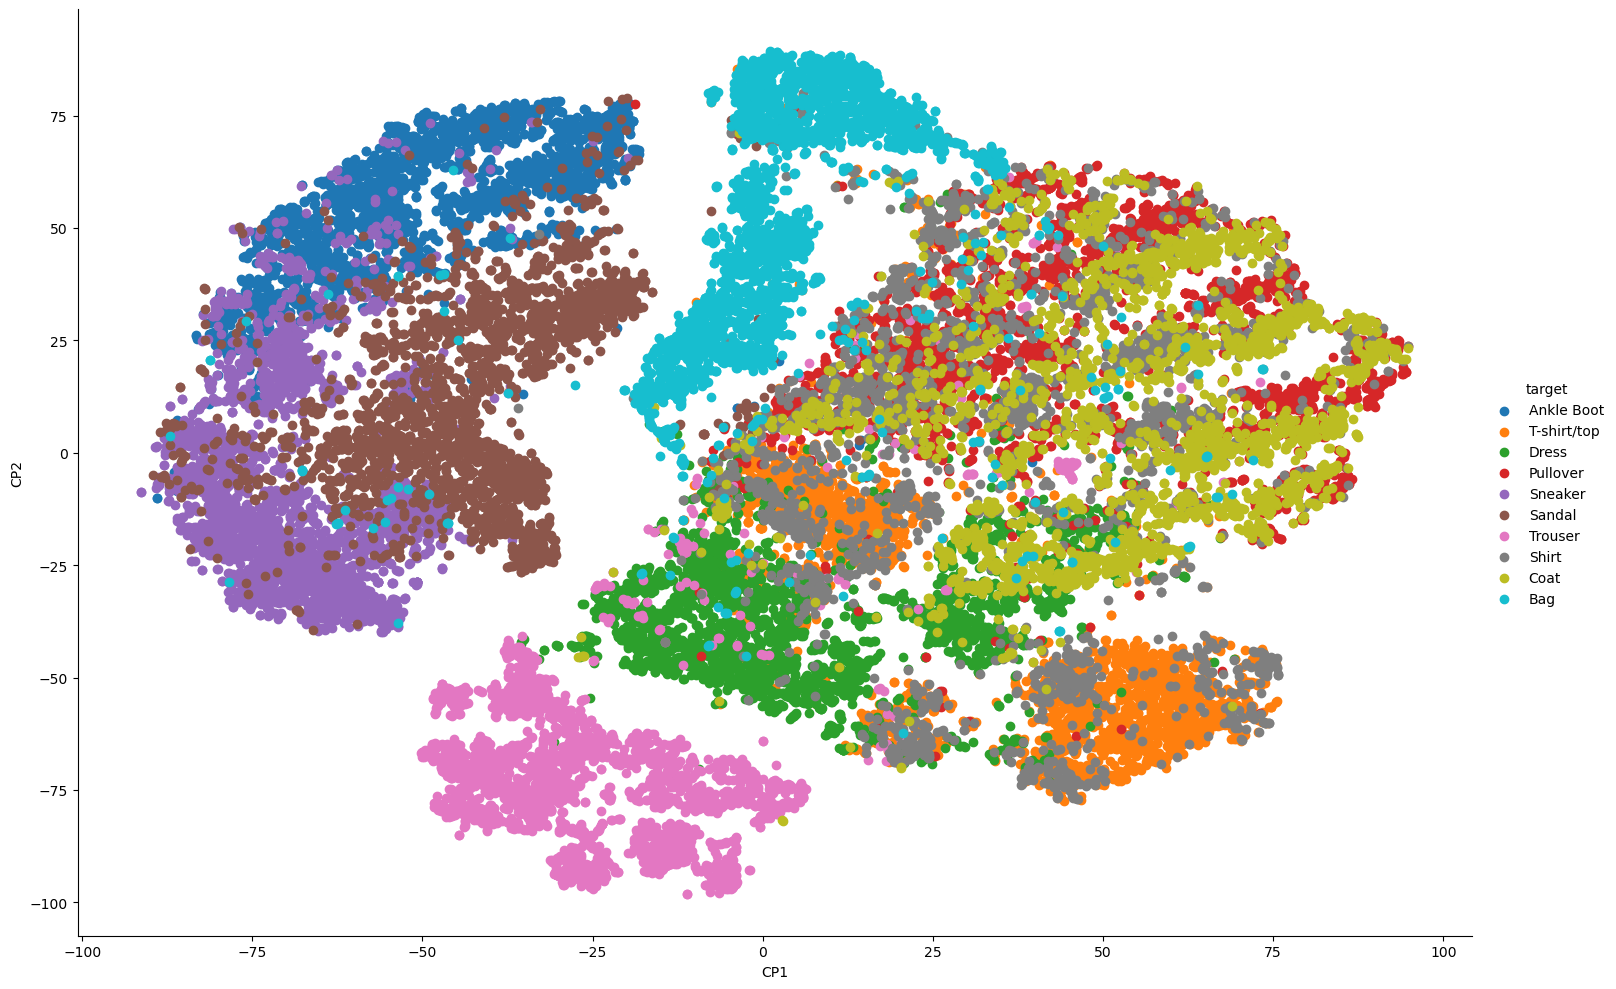

In [27]:
grid = sns.FacetGrid(cps_df, hue="target", height=10, aspect=1.5)
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()